In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('data.csv')

In [3]:
x1 = df['X1']
x2 = df['X2']
y = df['Y']

In [39]:
def ini():
    b1 = 0
    b2 = 0
    b0 = 0.0
    return b0, b1, b2

In [40]:
def forward(x1, x2, b0, b1, b2):
    z = b0 + b1*x1 + b2*x2
    return z

In [41]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

In [42]:
def error(a, y):
    delta = a - y
    return delta

In [43]:
def update_param(b0,b1,b2,x1, x2,alpha , delta):
    b0 = b0 - alpha * np.mean(delta)
    b1 = b1 - alpha * np.mean(delta* x1) 
    b2 = b2 - alpha * np.mean(delta * x2)
    return b0, b1, b2

In [131]:
loss = []
b1_l = []
b2_l = []
def gd(x1, x2, y, alpha, epochs):
    b0, b1, b2 = ini()
    
    for j in range(epochs):
        for i in range(len(df)):
            z = forward(x1[i], x2[i], b0, b1, b2)
            a = sigmoid(z)
            delta = error(a, y)
            b0, b1, b2 = update_param(b0, b1, b2, x1[i], x2[i], alpha, delta)
            loss.append(delta)
            b1_l.append(b1)
            b2_l.append(b2)
        if(j%5 == 0):
            print(f"Epoch: {j+1}, b0: {b0}, b1: {b1}, b2: {b2}")
    
        
    return b0,b1,b2

In [132]:
b0, b1, b2 = gd(x1, x2, y, 0.01, 100)

Epoch: 1, b0: 0.0, b1: -4.884981308350689e-18, b2: 1.4710455076283326e-18
Epoch: 6, b0: 0.0, b1: -2.930988785010415e-17, b2: 8.826273045769996e-18
Epoch: 11, b0: 1.554312234475219e-18, b1: -3.597122599785511e-17, b2: 1.5848433676524118e-17
Epoch: 16, b0: 3.8857805861880475e-18, b1: -3.3750779948604813e-17, b2: 2.2704060853584465e-17
Epoch: 21, b0: 6.217248937900876e-18, b1: -3.1530333899354517e-17, b2: 2.9559688030644816e-17
Epoch: 26, b0: 7.771561172376097e-18, b1: -3.8191672047105474e-17, b2: 3.658184866139895e-17
Epoch: 31, b0: 1.0103029524088927e-17, b1: -3.597122599785518e-17, b2: 4.3437475838459316e-17
Epoch: 36, b0: 1.2434497875801758e-17, b1: -3.375077994860488e-17, b2: 5.029310301551968e-17
Epoch: 41, b0: 1.476596622751459e-17, b1: -3.1530333899354585e-17, b2: 5.714873019258004e-17
Epoch: 46, b0: 1.6431300764452325e-17, b1: -3.4194869158454975e-17, b2: 5.77871084317395e-17
Epoch: 51, b0: 1.809663530139006e-17, b1: -3.6859404417555365e-17, b2: 5.842548667089899e-17
Epoch: 56, b

In [133]:
pred = [np.round(sigmoid(b0+b1*x1 + b2*x2)) for x1, x2 in zip(x1,x2)]

In [134]:
print(confusion_matrix(y, pred))

[[5 0]
 [5 0]]


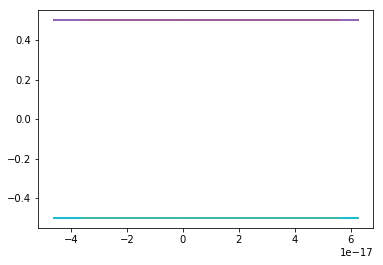

In [135]:
plt.plot(b2_l, loss)
plt.plot( b1_l, loss)
# print(b1_l)